In [25]:
from matplotlib import pyplot as plt
import numpy as np
from aeon.utils.plotting import plot_series
from aeon.datasets import load_airline
from aeon.forecasting.naive import NaiveForecaster
from aeon.forecasting.model_selection import temporal_train_test_split
from aeon.forecasting.base import ForecastingHorizon
from aeon.performance_metrics.forecasting import mean_absolute_percentage_error

In [26]:
y = load_airline()
y_train, y_test = temporal_train_test_split(y, test_size=36)
# we will try to forecast y_test from y_train

In [27]:
fh = np.arange(1, y_test.shape[0] + 1)

In [28]:
fh

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36])

In [29]:
forecaster = NaiveForecaster(strategy="last", sp=12)

forecaster.fit(y_train)

# y_pred will contain the predictions
y_pred = forecaster.predict(fh)

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

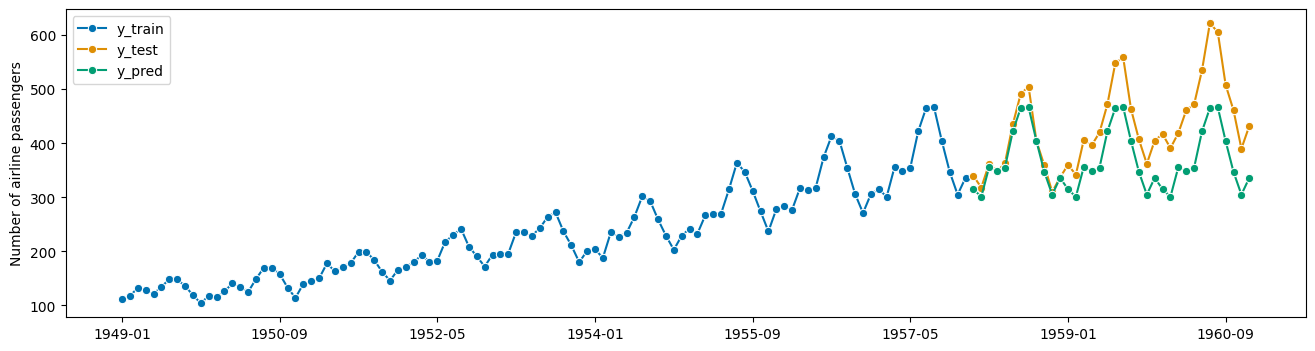

In [30]:
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

In [31]:
# option 1: using the lean function interface
mean_absolute_percentage_error(y_test, y_pred, symmetric=False)
# note: the FIRST argument is the ground truth, the SECOND argument are the forecasts
#       the order matters for most metrics in general

0.13189432350948402